# Predictive Modelling of Breast Cancer Diagnosis using K-Nearest Neighbors Algorithm

In this classification project we will be using the K-Nearest Neighbors (KNN) algorithm on the Breast Cancer Wisconsin (Diagnostic) dataset which can be found at [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic). The dataset contains 30 features which are extracted from a digitized image representing a fine needle aspirate (FNA) procedure conducted on a breast mass. 

Our task is to develop a predictive model that can accurately classify tumors as either benign or malignant given a set of features. The targets are binary values labeled either M = Malignant or B = Benign. Next, we import necessary libraries as well as the dataset. Note that the dataset has already been split into feature and target dataframes. The features for this dataset are summarised below:

| Variable Name       | Role    | Type       | Description | Units | Missing Values |
|---------------------|---------|------------|-------------|-------|----------------|
| ID                  | ID      | Categorical|             |       | no             |
| Diagnosis           | Target  | Categorical|             |       | no             |
| radius1             | Feature | Continuous |             |       | no             |
| texture1            | Feature | Continuous |             |       | no             |
| perimeter1          | Feature | Continuous |             |       | no             |
| area1               | Feature | Continuous |             |       | no             |
| smoothness1         | Feature | Continuous |             |       | no             |
| compactness1        | Feature | Continuous |             |       | no             |
| concavity1          | Feature | Continuous |             |       | no             |
| concave_points1     | Feature | Continuous |             |       | no             |
| symmetry1           | Feature | Continuous |             |       | no             |
| fractal_dimension1  | Feature | Continuous |             |       | no             |
| radius2             | Feature | Continuous |             |       | no             |
| texture2            | Feature | Continuous |             |       | no             |
| perimeter2          | Feature | Continuous |             |       | no             |
| area2               | Feature | Continuous |             |       | no             |
| smoothness2         | Feature | Continuous |             |       | no             |
| compactness2        | Feature | Continuous |             |       | no             |
| concavity2          | Feature | Continuous |             |       | no             |
| concave_points2     | Feature | Continuous |             |       | no             |
| symmetry2           | Feature | Continuous |             |       | no             |
| fractal_dimension2  | Feature | Continuous |             |       | no             |
| radius3             | Feature | Continuous |             |       | no             |
| texture3            | Feature | Continuous |             |       | no             |
| perimeter3          | Feature | Continuous |             |       | no             |
| area3               | Feature | Continuous |             |       | no             |
| smoothness3         | Feature | Continuous |             |       | no             |
| compactness3        | Feature | Continuous |             |       | no             |
| concavity3          | Feature | Continuous |             |       | no             |
| concave_points3     | Feature | Continuous |             |       | no             |
| symmetry3           | Feature | Continuous |             |       | no             |
| fractal_dimension3  | Feature | Continuous |             |       | no             |

In [66]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import warnings
import numpy as np
from sklearn.model_selection import validation_curve
warnings.filterwarnings('ignore') 

In [67]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

Now let's display the first five entries of both features and targets to get a better idea of the data.

In [68]:
display(X.head()), display(y.head())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


(None, None)

|   | radius1 | texture1 | perimeter1 | area1 | smoothness1 | compactness1 | concavity1 | concave_points1 | symmetry1 | fractal_dimension1 | ... | radius3 | texture3 | perimeter3 | area3 | smoothness3 | compactness3 | concavity3 | concave_points3 | symmetry3 | fractal_dimension3 |
|---|---------|----------|------------|-------|-------------|--------------|------------|-----------------|-----------|--------------------|-----|---------|----------|------------|-------|-------------|--------------|------------|-----------------|-----------|--------------------|
| 0 | 17.99   | 10.38    | 122.80     | 1001.0| 0.11840     | 0.27760      | 0.3001     | 0.14710         | 0.2419    | 0.07871            | ... | 25.38   | 17.33    | 184.60     | 2019.0| 0.1622      | 0.6656       | 0.7119     | 0.2654          | 0.4601    | 0.11890            |
| 1 | 20.57   | 17.77    | 132.90     | 1326.0| 0.08474     | 0.07864      | 0.0869     | 0.07017         | 0.1812    | 0.05667            | ... | 24.99   | 23.41    | 158.80     | 1956.0| 0.1238      | 0.1866       | 0.2416     | 0.1860          | 0.2750    | 0.08902            |
| 2 | 19.69   | 21.25    | 130.00     | 1203.0| 0.10960     | 0.15990      | 0.1974     | 0.12790         | 0.2069    | 0.05999            | ... | 23.57   | 25.53    | 152.50     | 1709.0| 0.1444      | 0.4245       | 0.4504     | 0.2430          | 0.3613    | 0.08758            |
| 3 | 11.42   | 20.38    | 77.58      | 386.1 | 0.14250     | 0.28390      | 0.2414     | 0.10520         | 0.2597    | 0.09744            | ... | 14.91   | 26.50    | 98.87      | 567.7 | 0.2098      | 0.8663       | 0.6869     | 0.2575          | 0.6638    | 0.17300            |
| 4 | 20.29   | 14.34    | 135.10     | 1297.0| 0.10030     | 0.13280      | 0.1980     | 0.10430         | 0.1809    | 0.05883            | ... | 22.54   | 16.67    | 152.20     | 1575.0| 0.1374      | 0.2050       | 0.4000     | 0.1625          | 0.2364    | 0.07678            |

|   | Diagnosis |
|---|-----------|
| 0 | M         |
| 1 | M         |
| 2 | M         |
| 3 | M         |
| 4 | M         |

We can see that the feature entries are all numerical whereas the target entries are categorical. We will now start with the data preparation, and our first task would be to encode the categorical variables of the target dataframe.

# Data Preparation

We start by changing the entries of the target dataframe to match the mapping M = 1 and B = 0.

In [69]:
# Change entries to numerical values
y["Diagnosis"] = (y["Diagnosis"] == 'M').astype(int)

In [70]:
# Print dataframe
y.tail()

,Diagnosis
564,1
565,1
566,1
567,1
568,0


Now the targets dataframe contains numerical values. This makes it possible to perform mathematical operations on the data.
|   | Diagnosis |
|---|-----------|
| 0 | 1        |
| 1 | 1         |
| 2 | 1        |
| 3 | 1         |
| 4 | 1         |
| ... | ...         |
| 568 | 0         |

Next we will use the MinMaxScaler method to normalise the input features to mitigate any biased results in the calculations performed by KNN. We do this because it is clear from the features dataframe that each feature contain different ranges, for example some values are between 0 and 1 whereas others are between 100 and 1000. The MinMax method normalises our data to fit within a range of 0 to 1.

In [71]:
# create a scaler object
scaler = MinMaxScaler()
X_normalised = scaler.fit_transform(X)

In [72]:
X_normalised_df = pd.DataFrame(X_normalised, columns=X.columns)

In [73]:
X_normalised_df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Now all features contain data within the same range since we have normalised the data. Next we can start to train the model.

# Training the Model
We start by splitting the features and targets dataframes into training and testing dataframes where 20% of the data goes to testing and the 80% remaining will be used to train the model. After this, we create a knn object and fit it to our training data, however we still have to choose the number of neighbors, so we optimise this selection by plotting validation curves for a selection of these numbers and make a choice based on the results.

In [74]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X_normalised_df, y, test_size=0.20, random_state=1)

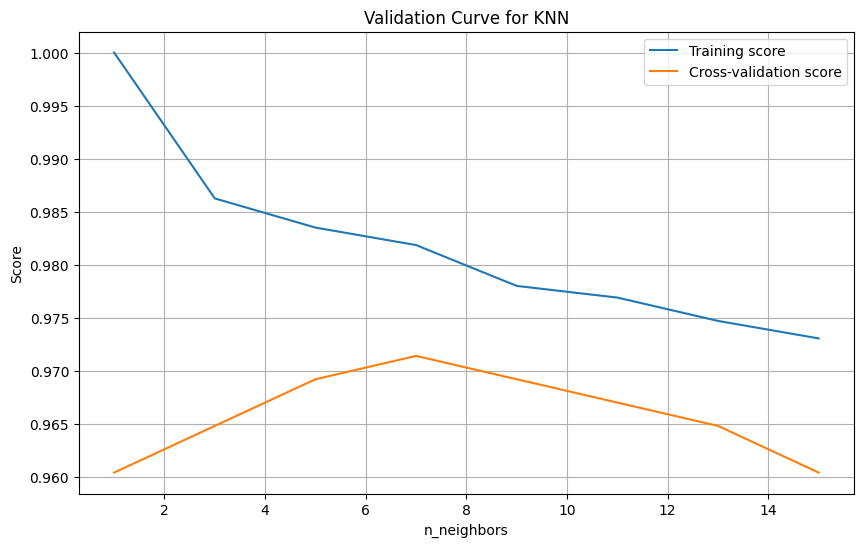

In [75]:
# range of n_neighbors values
param_range = [1, 3, 5, 7, 9, 11, 13, 15]

# validation curve scores
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train, param_name="n_neighbors", param_range=param_range, cv=5
)

# validation curves
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.xlabel("n_neighbors")
plt.ylabel("Score")
plt.title("Validation Curve for KNN")
plt.legend()
plt.grid()
plt.show()

We see that the cross-validation score curve peaks at n_neighbors = 7, so this will be our selection. Now let's create the model.

In [76]:
# Build the KNN model
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the data to the model
knn.fit(X_train, y_train)

# Create predictions
y_prediction = knn.predict(X_test)

# Model Performance and Evaluation Metrics
Now that the model has been created we can evaluate its performance on the testing data. We will look at the model accuracy, its confusion matrix and then create a classification report.

In [77]:
# accuracy
accuracy = accuracy_score(y_test, y_prediction)

# confusion matrix
cm = confusion_matrix(y_test, y_prediction)

# classification report
report = classification_report(y_test, y_prediction)

print(f"Model Accuracy Score: {accuracy}")

print("\nModel Confusion Matrix:\n")
display(cm)

print("\nClassification Report:\n")
print(report)

Model Accuracy Score: 0.9473684210526315

Model Confusion Matrix:



array([[71,  1],
       [ 5, 37]], dtype=int64)


Classification Report:

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



Classification Report:
|           | Precision | Recall | F1-Score | Support |
|-----------|-----------|--------|----------|---------|
| Class 0   | 0.93      | 0.99   | 0.96     | 72      |
| Class 1   | 0.97      | 0.88   | 0.93     | 42      |
| Accuracy  |           |        | 0.95     | 114     |
| Macro Avg | 0.95      | 0.93   | 0.94     | 114     |
| Weighted Avg | 0.95   | 0.95   | 0.95     | 114     |
     |

Our model has an accuracy score of 94.7% which is remarkable. Looking at the classification report, we should note that class 1 corresponds to malignant cases and class 0 corresponds to benign cases. From the Precision column we see that 93% of the samples predicted as benign were actually benign and 97% of the samples predicted as malignant were actually malignant.

Furthermore, from the recall column we see that 99% of actual benign samples were correctly identified, but only 88% of the malignant samples were correctly identified. This is still impressive. Moreover, we see that both classes have a balanced precision and recall measure by looking at their F1 scores. Lastly, the support columns tells us that 72 samples were benign and 42 samples were malignant.

In summary, our model predicted the correct class for 95% of the testing samples which indicates a strong performance in distinguishing between "Benign" and "Malignant" breast cancer cases.

# Data Visualisation


Since we have many features, we can use principle component analysis to reduce the dimentionality of the data.

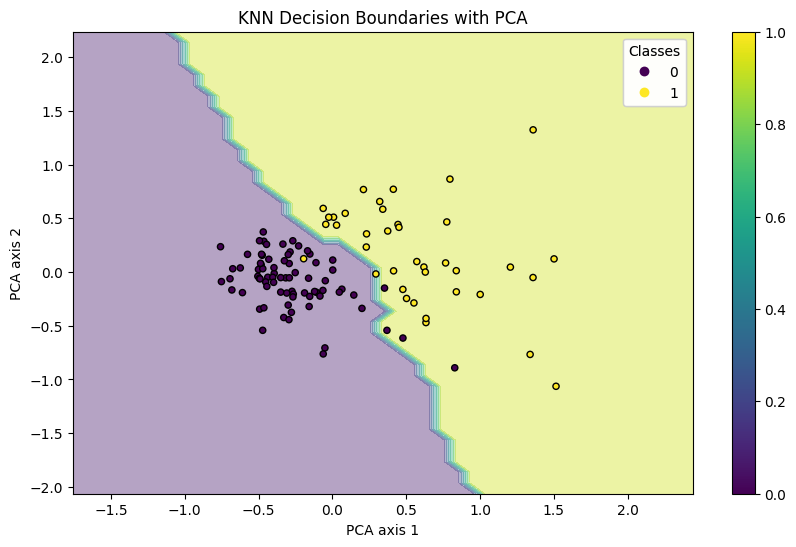

In [78]:
def plot_decision_boundaries(X, y, model):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    model.fit(X_pca, y)
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, edgecolor='k')
    plt.xlabel('PCA axis 1')
    plt.ylabel('PCA axis 2')
    plt.title('KNN Decision Boundaries with PCA')
    plt.colorbar()
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.show()

plot_decision_boundaries(X_test, y_prediction, knn)

The results above clearly show the decision bounary of our model and there is a clear distinction between "Class 0 - Benign" and "Class 1 - Malignant" observations. This model is reasonably accurate and can be saved for future use.